In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Project : SPAM/HAM Classification
### Datset : Tab separated dataset
### Columns : The datset will be divided into two separate columns as label and message 
### Columns Description : Message-> Talks about the entire data
###                       label -> Output

In [9]:
# Importing the dataset

import pandas as pd

messages = pd.read_csv('/content/drive/MyDrive/CorporateTraining/NLP/Day1/Demo6-Word2Vec&AvdWord2Vec/SMSSpamCollection', sep = '\t', names = ["label", "message"])

In [10]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Before Preprocessing,lets check the shape of the datset

In [11]:
messages.shape

(5572, 2)

### IF we want pick a particullar row we can do it by the help of indexing

In [12]:
messages['message'].loc[100]

"Please don't text me anymore. I have nothing else to say."

In [13]:
messages['message'].loc[2000]

"LMAO where's your fish memory when I need it?"

### Data Cleaning & Preprocessing
### Text Processing:
1. Tokenization
2. Stopwords
3. Stemming
4. Lemmatization

In [14]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

Applying Stopwords and converting the words to lowercase

In [16]:

corpus = []
for i in range(0, len(messages)):
  ## Step 1: we need to remove all the special characters apart from all from a - z, A - Z & 0 - 9
    review = re.sub('[^a-zA-Z0-9]', ' ', messages['message'][i])
  ## Step 2: Lowering of sentences such that duplicate words will not be there
    review = review.lower()
  ## Step 3: Split the sentences into words
    review = review.split()
  ## Step 4: Apply stops words and then apply stemming on the all the other words  
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free mem

In [18]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
## max_features basically talks about the top 2500 most frequent features
cv = CountVectorizer(max_features=2500,binary=True)
X = cv.fit_transform(corpus).toarray()

In [19]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
## we can also introduce nggrams as well
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
## max_features basically talks about the top 2500 most frequent features
cv = CountVectorizer(max_features=2500,binary=True,ngram_range=(2,2))
X = cv.fit_transform(corpus).toarray()

In [21]:
X.shape

(5572, 2500)

###Need to do Label Encoding for all the Y males

In [22]:
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [23]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

### Divide the dataset into training and testing data using train - test split



In [24]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [25]:
## Lets see the X_train & y_train
X_train, y_train

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), array([0, 0, 0, ..., 1, 0, 0], dtype=uint8))

In [26]:
## Similarly for X_test & y_test
X_test, y_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), array([0, 1, 0, ..., 0, 1, 0], dtype=uint8))

### Since this is a classification problem, we are going to make use of multinomial Naive Bayes algorithm as shown below to train our model

In [27]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

### Prediction

In [28]:
#prediction
y_pred=spam_detect_model.predict(X_test)


### Classification Accuracy report

In [29]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_test,y_pred)
print(score)

0.9721973094170404


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       986
           1       0.81      1.00      0.89       129

    accuracy                           0.97      1115
   macro avg       0.90      0.98      0.94      1115
weighted avg       0.98      0.97      0.97      1115



### Now let's create a TFIDF Model as shown below

In [31]:
# Creating the TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(corpus).toarray()

### We can also introduce the hyperparameter nggrams while training the just as the way shown below

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500, ngram_range=(1,2))
X = tv.fit_transform(corpus).toarray()

### Divide the dataset into training and testing data using train - test split


In [33]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Since this is a classification problem, we are going to make use of multinomial Naive Bayes algorithm as shown below to train our model

In [34]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [35]:
#prediction
y_pred=spam_detect_model.predict(X_test)


In [36]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9811659192825112


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       976
           1       0.87      1.00      0.93       139

    accuracy                           0.98      1115
   macro avg       0.93      0.99      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### Now lets apply a different ML algorithm for classification

### Algorithm that we will be using is Random Forest CLassification

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifer = RandomForestClassifier()
classifer.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
y_pred=classifer.predict(X_test)

In [40]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9820627802690582
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       975
           1       0.88      1.00      0.93       140

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### Word2Vec Implementation
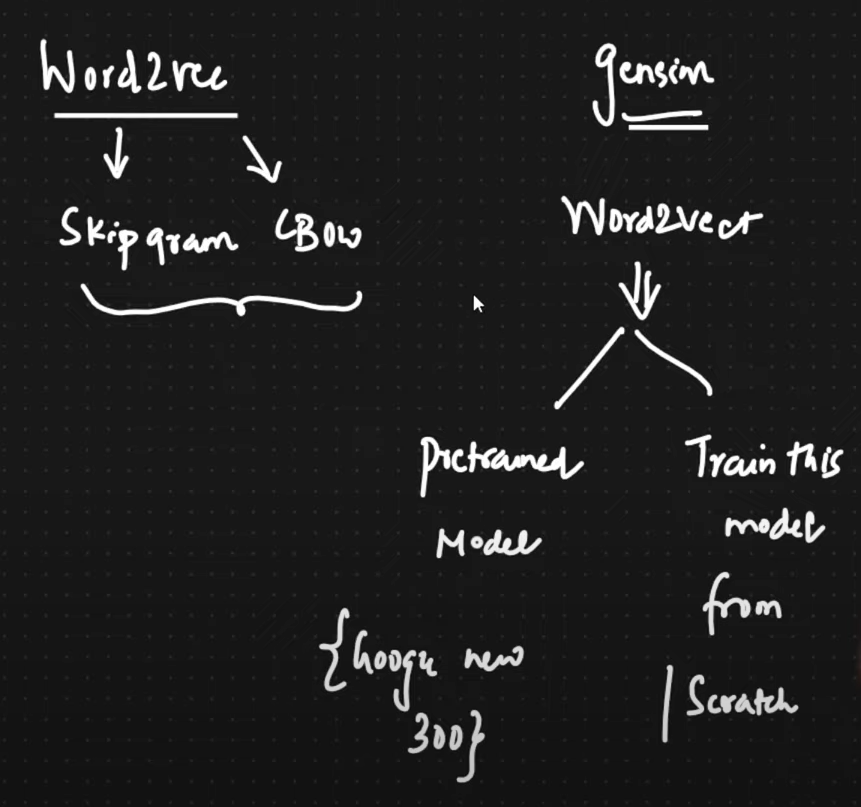

Now there are two ways to train the model

1. BY either using Pretrained model
2. Training the model from scratch

Out of these two ways which one is usefull??
 To answer these, if 75% of your data is captured in the pretrained model, then go for pretrained model. If you have data, where are not present in the pretrained model, then we acn train the model from scratch

###Note: Most of the industries tries to create their own specific model 

###Bottleneck of Word2Vec

In Word2Vec what happens is each word gets converted into n dimenion vector depending on the pretrained model or your own custamized model. But what we want is to convert the entire sentemce/document into n dimension problem rather than single word.
So for solving this issue, a new concept was introduced that is AvgWord2vec


###AvgWord2vec
## What used to happen in Word2Vec is shown in the below screenshot
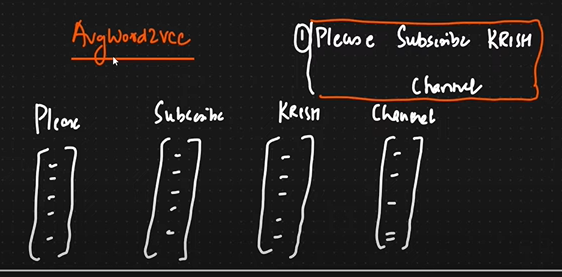

In case of AvgWord2vec we are going to add all the vectors of n dimensions into one vector as shown below

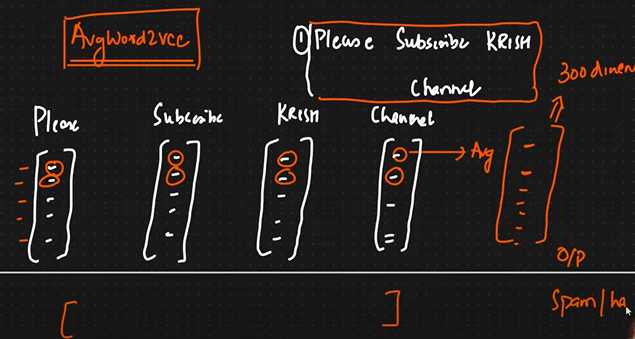


In [41]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Let's apply Lemmatization techniques using WordNetLemmetizer to find out the perfoemance of the model

In [42]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [43]:
corpus = []
for i in range(0, len(messages)):
  review = re.sub('[^a-zA-Z0-9]', ' ',messages['message'][i])
  review = review.lower()
  review = review.split()

  review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [44]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling 3 week word back like fun still tb ok xxx std chgs send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune',
 'winner valued network customer selected receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6days 16 tsandcs apply reply

In [47]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [48]:
corpus[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [49]:
nltk.download('punkt')
words=[]
for sent in corpus:
  sent_token = sent_tokenize(sent)
  for sent in sent_token:
    words.append(simple_preprocess(sent))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [50]:
words

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply',
  'over'],
 ['dun', 'say', 'early', 'hor', 'already', 'say'],
 ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'caller',
  'press',
  'copy',
  'friend',
  'callertune'],
 ['winner',
  'valued',
  'network',
  'customer',
  'selected',
  're

### Now Let's try to create a Word2Vec model from scratch

In [51]:
import gensim
model=gensim.models.Word2Vec(words, window=5, min_count=2)

In [52]:
## Lets see the Vocabulary (Unique Words)

model.wv.index2word

['call',
 'get',
 'ur',
 'gt',
 'go',
 'lt',
 'ok',
 'free',
 'day',
 'know',
 'come',
 'like',
 'good',
 'time',
 'got',
 'text',
 'love',
 'want',
 'send',
 'need',
 'one',
 'txt',
 'today',
 'going',
 'stop',
 'home',
 'lor',
 'sorry',
 'see',
 'still',
 'mobile',
 'take',
 'back',
 'da',
 'reply',
 'dont',
 'think',
 'tell',
 'week',
 'hi',
 'phone',
 'new',
 'please',
 'later',
 'pls',
 'co',
 'msg',
 'make',
 'dear',
 'night',
 'message',
 'say',
 'well',
 'min',
 'thing',
 'much',
 'great',
 'claim',
 'oh',
 'hope',
 'hey',
 'give',
 'number',
 'happy',
 'wat',
 'friend',
 'work',
 'yes',
 'way',
 'www',
 'let',
 'prize',
 'right',
 'tomorrow',
 'already',
 'win',
 'ask',
 'said',
 'life',
 'cash',
 'amp',
 'yeah',
 'im',
 'really',
 'tone',
 'meet',
 'babe',
 'find',
 'miss',
 'morning',
 'thanks',
 'uk',
 'service',
 'last',
 'com',
 'anything',
 'would',
 'care',
 'year',
 'lol',
 'nokia',
 'also',
 'feel',
 'every',
 'keep',
 'sure',
 'pick',
 'urgent',
 'contact',
 'sent',


In [53]:
## Total Vocabulary Size
model.corpus_count

5565

In [54]:
model.epochs

5

In [55]:
model.wv.similar_by_word('hope')

[('day', 0.9999285340309143),
 ('need', 0.9999232292175293),
 ('back', 0.9999215006828308),
 ('love', 0.9999203085899353),
 ('give', 0.9999200105667114),
 ('thing', 0.9999170303344727),
 ('get', 0.999915361404419),
 ('today', 0.999911904335022),
 ('go', 0.999910295009613),
 ('one', 0.9999091029167175)]

### Lets see the dimention of each vector for each word

In [56]:
model.wv['mode', 'egg', 'sofa'].shape

(3, 100)

In [66]:
def avg_word2vec(doc):
    # remove out-of-vocabulary words
    #sent = [word for word in doc if word in model.wv.index_to_key]
    #print(sent)
    ## Here we are making use of CBOW
    return np.mean([model.wv[word] for word in doc if word in model.wv.index2word],axis=0)
                #or [np.zeros(len(model.wv.index_to_key))], axis=0)
        

In [67]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
from tqdm import tqdm

In [69]:
words[73]

['performed']

In [70]:
type(model.wv.index2word)

list

In [85]:
## Apply for the entire sentences
X=[]
for i in tqdm(range(len(words))):
  X.append(avg_word2vec(words[i]))

  0%|          | 0/5565 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 5565/5565 [00:01<00:00, 4473.50it/s]


In [86]:
type(X)

list

In [88]:
X_arr = np.array(X)

<ipython-input-88-69e4e399e660>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_arr = np.array(X)


In [89]:
X_arr.shape

(5565,)

### Convert this list to an Array

In [73]:
X_new = np.array(X)

<ipython-input-73-fed0be51dbbf>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_new = np.array(X)


In [76]:
words[1]

['ok', 'lar', 'joking', 'wif', 'oni']

In [77]:
X_new[1]

array([-0.00518347,  0.01434943, -0.27010337,  0.29779503,  0.04466049,
       -0.01965277,  0.19528548, -0.20357211, -0.19257766,  0.07487889,
        0.14268585, -0.11308261, -0.16705927, -0.04417022, -0.04410836,
        0.15682627,  0.02314063, -0.10758869, -0.09529143,  0.20986286,
       -0.08038512, -0.12307998, -0.01035945, -0.16191849, -0.2222302 ,
        0.04018532, -0.17064929, -0.06495001,  0.1312851 , -0.09416285,
        0.12711546,  0.06916238, -0.10953347, -0.03022774,  0.17842212,
        0.09965152, -0.04644362, -0.2129184 ,  0.06958701,  0.00304826,
       -0.14762275,  0.20281248,  0.03246284, -0.08253998,  0.01293801,
       -0.00162141, -0.03821137,  0.09156589, -0.05695407, -0.06197567,
       -0.13107595,  0.050678  ,  0.07532165,  0.10789376,  0.1815525 ,
       -0.03708073,  0.05403866,  0.0216526 ,  0.05193317,  0.15988463,
        0.11816382, -0.04803334,  0.07952852,  0.03322665, -0.28427765,
        0.06412971, -0.09444363,  0.01276412,  0.03319139,  0.02

In [78]:
X_new

array([array([-0.00623958,  0.02034007, -0.40138233,  0.44622937,  0.06644675,
              -0.02845965,  0.29755387, -0.30191287, -0.28782025,  0.11162955,
               0.21390687, -0.1715926 , -0.2530423 , -0.0617726 , -0.06766478,
               0.23141687,  0.0358558 , -0.15878476, -0.14470054,  0.31632444,
              -0.12046191, -0.18624878, -0.01708038, -0.24024154, -0.33025214,
               0.05841145, -0.25445494, -0.10056127,  0.19765592, -0.1432034 ,
               0.18939798,  0.10074226, -0.16459091, -0.04114475,  0.26339722,
               0.14707133, -0.069824  , -0.31926534,  0.10762957,  0.00457828,
              -0.22365205,  0.29929504,  0.05172488, -0.12424218,  0.02075971,
              -0.00622573, -0.05612224,  0.13676307, -0.08103896, -0.09852928,
              -0.19819076,  0.08137999,  0.10982865,  0.16282593,  0.2682388 ,
              -0.05633084,  0.08361369,  0.03345431,  0.07614609,  0.24201964,
               0.18009667, -0.07430454,  0.1251338 ,

In [79]:
X_new[5]

array([-0.00932575,  0.02138007, -0.47083744,  0.5237052 ,  0.07931399,
       -0.03098752,  0.34893766, -0.35204035, -0.33725616,  0.13018355,
        0.24941418, -0.19961245, -0.29473823, -0.07581441, -0.07856883,
        0.27123782,  0.04171741, -0.1862171 , -0.16964626,  0.3719874 ,
       -0.13969883, -0.21830994, -0.01815279, -0.28181836, -0.3884881 ,
        0.07103756, -0.29802412, -0.11559376,  0.23188987, -0.16883707,
        0.22018546,  0.11607048, -0.19287084, -0.04873649,  0.30903292,
        0.17336403, -0.08140103, -0.3768611 ,  0.12673801,  0.00695352,
       -0.26382214,  0.35217613,  0.06379373, -0.14388956,  0.02265774,
       -0.00868771, -0.06494164,  0.1608253 , -0.09472618, -0.11276824,
       -0.23101139,  0.09408216,  0.12929067,  0.19168516,  0.31576934,
       -0.06714189,  0.09640689,  0.03940362,  0.08738351,  0.28391582,
        0.21273164, -0.08533605,  0.14440943,  0.05944582, -0.5022007 ,
        0.10924391, -0.16481803,  0.01882579,  0.054022  ,  0.04

In [80]:
X_new[2000]

array([-0.01016449,  0.02066413, -0.4826864 ,  0.53623503,  0.08271854,
       -0.02975434,  0.3566434 , -0.36070663, -0.34545833,  0.13423295,
        0.25876993, -0.20764436, -0.30256537, -0.07829776, -0.08201028,
        0.27673548,  0.04249511, -0.18860266, -0.1733664 ,  0.3817504 ,
       -0.14580101, -0.22397186, -0.02040268, -0.28615296, -0.3944921 ,
        0.07322575, -0.3056031 , -0.12225841,  0.23732485, -0.17258194,
        0.22577444,  0.12036501, -0.19892164, -0.0521555 ,  0.31516004,
        0.17821488, -0.08262382, -0.38734025,  0.13084921,  0.00646838,
       -0.2693025 ,  0.3624077 ,  0.06280202, -0.15050006,  0.02168457,
       -0.00578836, -0.06803827,  0.16388805, -0.09881884, -0.11545769,
       -0.2392182 ,  0.09761094,  0.13577041,  0.19619076,  0.32191873,
       -0.06880063,  0.09780399,  0.03959055,  0.08829349,  0.29039747,
        0.21674657, -0.08942748,  0.14551151,  0.06581924, -0.51660323,
        0.11240137, -0.16600731,  0.01957182,  0.05630387,  0.04

### Divide the dataset into training and testing data using train - test split

In [83]:
X_new.shape

(5565,)

In [84]:
y.shape

(5572,)

In [81]:
## Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 0)


ValueError: ignored